In [26]:
# @Author : Anirudh Sathish 
# @Roll No : CS20B1125 
# Assignment 1 DIP 

Take the Lena image and convert it into gray scale image.

In [27]:
# Import necceary libraries 
import cv2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

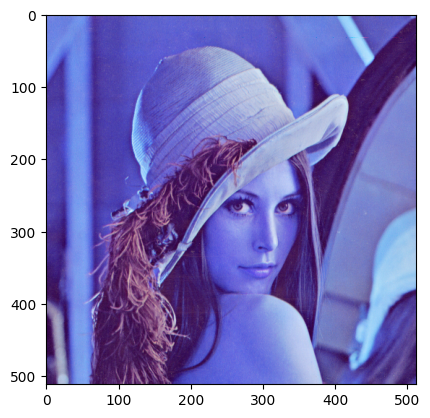

In [28]:
img = cv2.imread("Lena.png")
plt.imshow(img)
plt.show()

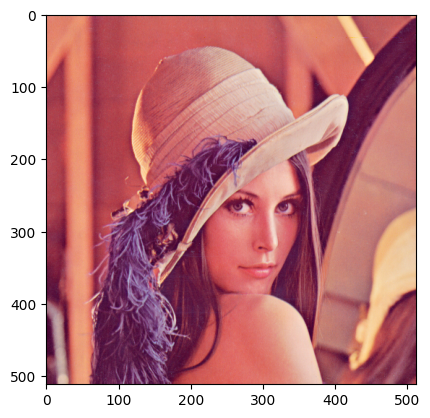

In [29]:
# The above image is in the BGR format , rather than RGB. Let us make the conversion 
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

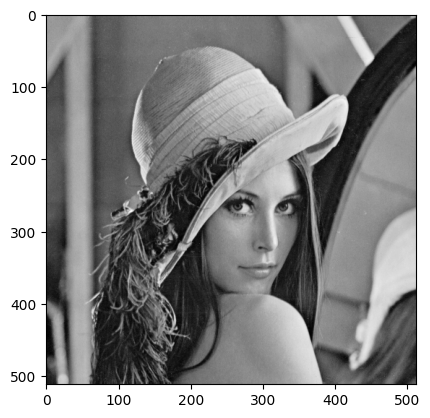

In [30]:
# Converting Lena to greyscale 
Lena_Grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(Lena_Grey,cmap="gray")
plt.show()

Scale it by factors of 1,2,0.5 using bilinear interpolation methods.

Using Built in Methods 

In [31]:
import math  
def bilinearInterpolation(grid,Scale,outputGrid):
    for row in range(outputGrid.shape[0]):
        for column in range(outputGrid.shape[1]):
            row_ = row/Scale
            column_ = column/Scale
            
            # Find neighbouring points 
            neighbour1_x , neighbour1_y = int(np.floor(row_)),int(np.floor(column_))
            neighbour2_x , neighbour2_y = int(np.floor(row_)),int(np.ceil(column_))
            neighbour3_x , neighbour3_y = int(np.ceil(row_)),int(np.floor(column_))
            neigh4_x , neigh4_y = int(np.ceil(row_)),int(np.ceil(column_))

            # Check if follows bounds 
            neighbour1_x = min(neighbour1_x,grid.shape[0]-1)
            neighbour2_x = min(neighbour2_x,grid.shape[0]-1)
            neighbour3_x = min(neighbour3_x,grid.shape[0]-1)
            neigh4_x = min(neigh4_x,grid.shape[0]-1)
            neighbour1_y = min(neighbour1_y,grid.shape[1]-1)
            neighbour2_y = min(neighbour2_y,grid.shape[1]-1)
            neighbour3_y = min(neighbour3_y,grid.shape[1]-1)
            neigh4_y = min(neigh4_y,grid.shape[1]-1)
            # Calculate the areas 
            # For which calculate the length differences 
            horizontal_difference = row_ - neighbour1_x
            h_ = 1-horizontal_difference

            # vertical differnce 
            vertical_difference =column_-neighbour1_y
            v_ = 1- vertical_difference
    
            if(horizontal_difference == 0 and vertical_difference == 0):
                outputGrid[row][column] = grid[int(row_)][int(column_)]
            elif(horizontal_difference ==0):
                outputGrid[row][column] = grid[neighbour1_x][neighbour1_y]*v_+grid[neighbour2_x][neighbour2_y]*vertical_difference
            elif(vertical_difference == 0):
                outputGrid[row][column] = grid[neighbour1_x][neighbour1_y]*h_+grid[neighbour3_x][neighbour3_y]*horizontal_difference
            else:
                # find areas and deal 

                # Region wise area 
                bottomLeft = horizontal_difference*vertical_difference
                topLeft = horizontal_difference*v_
                topRight = h_*v_
                bottomRight = h_*vertical_difference

                # Obtaining Required intesity 
                intensity = grid[neighbour1_x][neighbour1_y]*topRight + grid[neighbour2_x][neighbour2_y]*bottomRight+grid[neighbour3_x][neighbour3_y]*topLeft+grid[neigh4_x][neigh4_y]*bottomLeft
                ceiled = int(np.ceil(intensity))
                outputGrid[row][column] = int(ceiled)
        
                       
    return outputGrid

For Scale 2 using user defined 

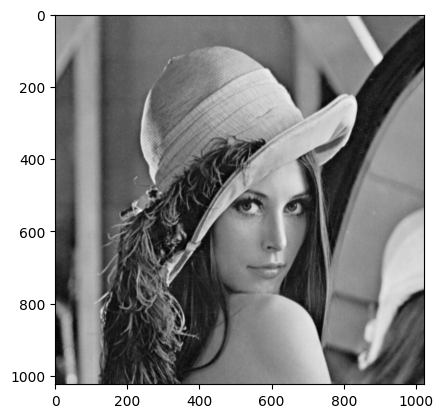

In [32]:
requiredScale = 2 
Lena_Grey_new = np.zeros([Lena_Grey.shape[0]*requiredScale,Lena_Grey.shape[1]*requiredScale],dtype = int) 
Lena_Grey_n = bilinearInterpolation(Lena_Grey,requiredScale,Lena_Grey_new)
plt.imshow(Lena_Grey_new,cmap = "gray")
plt.show()

For Scale 1 using user defined

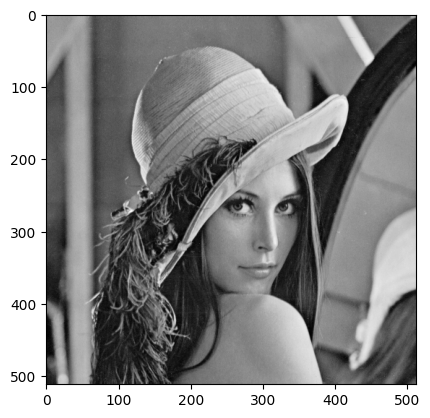

In [33]:
requiredScale = 1 
Lena_Grey_new = np.zeros([Lena_Grey.shape[0]*requiredScale,Lena_Grey.shape[1]*requiredScale],dtype = int) 
Lena_Grey_n = bilinearInterpolation(Lena_Grey,requiredScale,Lena_Grey_new)
plt.imshow(Lena_Grey_new,cmap="gray")
plt.show()

For scale 0.5 using user defined 

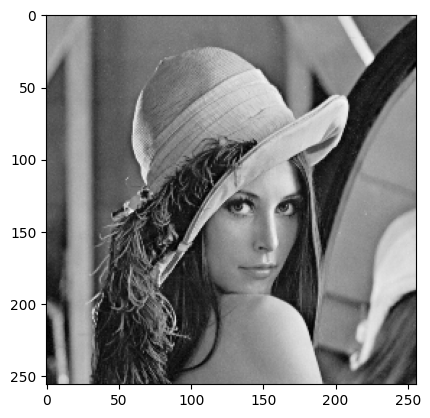

In [34]:
requiredScale = 0.5 
w = int(Lena_Grey.shape[0]*requiredScale)
h = int(Lena_Grey.shape[1]*requiredScale)
Lena_Grey_new = np.zeros((w,h),dtype = int) 
Lena_Grey_n = bilinearInterpolation(Lena_Grey,requiredScale,Lena_Grey_new)
plt.imshow(Lena_Grey_new,cmap = "gray")
plt.show()

Also, display the output of built-in functions for doing scaling by factors of 0.5,1 and 2.

For Scale 2 using built in 

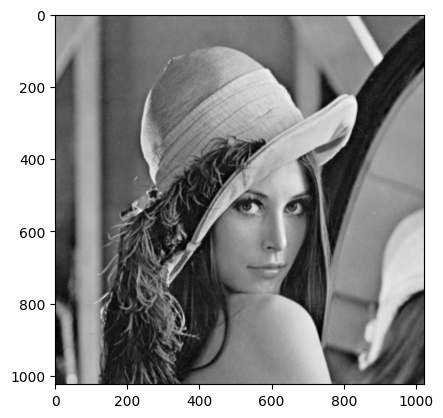

In [35]:
scale = 2
w  = int(Lena_Grey.shape[0]*scale)
h = int(Lena_Grey.shape[1]*scale)
Scaled2img = cv2.resize(Lena_Grey,(w,h),interpolation=cv2.INTER_LINEAR)
plt.imshow(Scaled2img,cmap="gray")
plt.show()

For Scale 1 using built in 

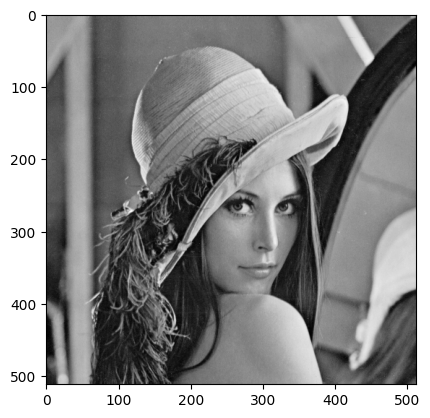

In [36]:
scale = 1
w  = int(Lena_Grey.shape[0]*scale)
h = int(Lena_Grey.shape[1]*scale)
Scaled2img = cv2.resize(Lena_Grey,(w,h),interpolation=cv2.INTER_LINEAR)
plt.imshow(Scaled2img,cmap="gray")
plt.show()

For Scale 0.5 using Built-in 

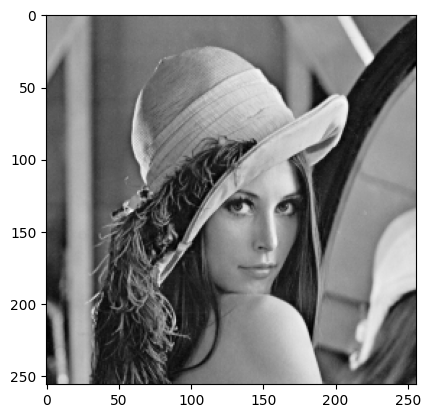

In [37]:
scale = 0.5
w  = int(Lena_Grey.shape[0]*scale)
h = int(Lena_Grey.shape[1]*scale)
Scaled2img = cv2.resize(Lena_Grey,(w,h),interpolation=cv2.INTER_LINEAR)
plt.imshow(Scaled2img,cmap="gray")
plt.show()